In [ ]:
#Представьте, что вы аналитик в сервисе такси. Ваша задача – написать функцию haversine для подсчета расстояния 
#между пунктами отправления и прибытия и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием.
#Задача: проделайте ту же операцию, что и в предыдущем шаге, но уже используя pd.itertuples()

In [20]:
#https://miro.medium.com/v2/resize:fit:720/format:webp/1*6amISXF-p34a4H9xRoJk1Q@2x.png

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def haversine(pickup_latitude, dropoff_latitude, pickup_longitude, dropoff_longitude, radius=6371):
    x1 = pickup_latitude 
    x2 = dropoff_latitude
    y1 = pickup_longitude
    y2 = dropoff_longitude
    d = 2 * radius * np.arcsin((np.sin((x1-x2)/2)**2 + np.cos(x2)*np.cos(x1)*(np.sin((y1-y2)/2))**2)**0.5)
    return d 


In [3]:
df = pd.read_csv('nyc.csv.zip', compression = 'zip')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
#Первый способ, используя df.iterrows()

In [4]:
%%time
df['distance'] = pd.Series(haversine(np.radians(row['pickup_latitude']), np.radians(row['dropoff_latitude']), 
                                     np.radians(row['pickup_longitude']), np.radians(row['dropoff_longitude']))
                           for i, row in df.iterrows())

CPU times: user 5.89 s, sys: 9.96 ms, total: 5.9 s
Wall time: 5.9 s


In [ ]:
#Второй способ, используя pd.itertuples()

In [5]:
%%time
df['distance_2'] = [haversine(np.radians(row.pickup_latitude), np.radians(row.dropoff_latitude), 
                                     np.radians(row.pickup_longitude), np.radians(row.dropoff_longitude))
                           for row in df.itertuples()]

CPU times: user 725 ms, sys: 0 ns, total: 725 ms
Wall time: 721 ms


In [ ]:
#Третий способ, используя метод pd.apply()

In [8]:
%%time
df['distance_3'] = df[['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude']].apply(lambda row: 
                                haversine(np.radians(row[0]), 
                                          np.radians(row[1]), 
                                          np.radians(row[2]), 
                                          np.radians(row[3])), axis=1)

CPU times: user 1.75 s, sys: 7.39 ms, total: 1.76 s
Wall time: 1.75 s


In [ ]:
#Еще один способ pd.apply()
# более медленный вариант

In [10]:
%%time
df['distance_4'] = df.apply(lambda x: haversine(np.radians(x['pickup_latitude']), 
                                              np.radians(x['dropoff_latitude']), 
                                              np.radians(x['pickup_longitude']), 
                                              np.radians(x['dropoff_longitude'])), axis=1)

CPU times: user 2.43 s, sys: 36 ms, total: 2.47 s
Wall time: 2.46 s


In [ ]:
#Четвертый способ: векторизация

In [17]:
%%time
df['distance_5'] = haversine( np.radians(df['pickup_latitude']), 
                              np.radians(df['dropoff_latitude']), 
                              np.radians(df['pickup_longitude']), 
                              np.radians(df['dropoff_longitude']))

CPU times: user 27.1 ms, sys: 0 ns, total: 27.1 ms
Wall time: 24.1 ms


In [ ]:
#Пятый способ: векторизация. Более быстрый способ

In [10]:
%%time
df['distance_6'] = haversine( np.radians(df['pickup_latitude'].values), 
                              np.radians(df['dropoff_latitude'].values), 
                              np.radians(df['pickup_longitude'].values), 
                              np.radians(df['dropoff_longitude'].values))

CPU times: user 10.4 ms, sys: 8.61 ms, total: 19 ms
Wall time: 17 ms


In [19]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_2,distance_3,distance_4,distance_5,distance_6
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,1.030764,1.030764,1.030764,1.030764,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,8.450134,8.450134,8.450134,8.450134,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,1.389525,1.389525,1.389525,1.389525,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2.799270,2.799270,2.799270,2.799270,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,1.999157,1.999157,1.999157,1.999157,1.999157


In [ ]:
#Рассчитаем, сколько заплатил пассажир, которые проехал самое большое расстояние. Возьмем расстояние до 50 км.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


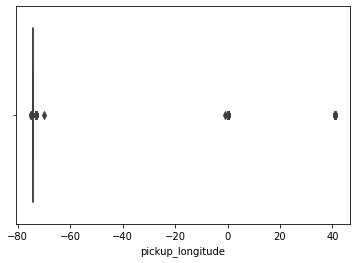

In [4]:
sns.boxplot(df.pickup_longitude.round(0))
#sns.boxplot(df.pickup_latitude.round(0))
#sns.boxplot(df.dropoff_longitude.round(0))
#sns.boxplot(df.dropoff_latitude.round(0))

In [ ]:
#10 < pickup_latitude < 120
pickup_longitude < -60
#10 < dropoff_latitude
#dropoff_longitude < -60

In [12]:
df_new = df[(df.pickup_latitude > 10.0)&(df.pickup_latitude < 120.0)&(df.pickup_longitude < -60.0)&(df.dropoff_latitude > 10.0)&(df.dropoff_longitude < -60.0)]

In [13]:
big_dist = df_new[df_new.distance_6 <= 50.0].distance_6.max()

In [14]:
df_new[df_new.distance_6 == big_dist].fare_amount

33502    136.0
Name: fare_amount, dtype: float64